In [34]:
import torch.optim as optim
import torch.utils.data as data
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
torch.manual_seed(1)
import torch.optim as optim
import torch.utils.data as data

In [35]:
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [37]:
pm_df = pd.read_csv('./split_0_8765.csv')
timeseries = pm_df[['Sample Measurement']].values.astype('float32')
train_size = int(len(timeseries) * 0.75)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]
train.shape, test.shape

((6574, 1), (2192, 1))

Epoch 0: train RMSE 3.1751, test RMSE 3.1607
Epoch 1: train RMSE 2.7586, test RMSE 2.4837
Epoch 2: train RMSE 2.5958, test RMSE 2.2249
Epoch 3: train RMSE 2.5137, test RMSE 2.1055
Epoch 4: train RMSE 2.5220, test RMSE 2.1383
Epoch 5: train RMSE 2.5204, test RMSE 2.1117
Epoch 6: train RMSE 2.4237, test RMSE 2.0017
Epoch 7: train RMSE 2.3894, test RMSE 1.9566
Epoch 8: train RMSE 2.4415, test RMSE 2.0356
Epoch 9: train RMSE 2.3998, test RMSE 1.9847
Epoch 10: train RMSE 2.3506, test RMSE 1.9241
Epoch 11: train RMSE 2.5858, test RMSE 2.2725
Epoch 12: train RMSE 2.3840, test RMSE 1.9950
Epoch 13: train RMSE 2.3516, test RMSE 1.9476
Epoch 14: train RMSE 2.5828, test RMSE 2.2667
Epoch 15: train RMSE 2.3460, test RMSE 1.9664
Epoch 16: train RMSE 2.3328, test RMSE 1.9327
Epoch 17: train RMSE 2.3549, test RMSE 2.0014
Epoch 18: train RMSE 2.3163, test RMSE 1.9189
Epoch 19: train RMSE 2.4055, test RMSE 2.0773
Epoch 20: train RMSE 2.3026, test RMSE 1.9131
Epoch 21: train RMSE 2.3060, test RMSE 1.927

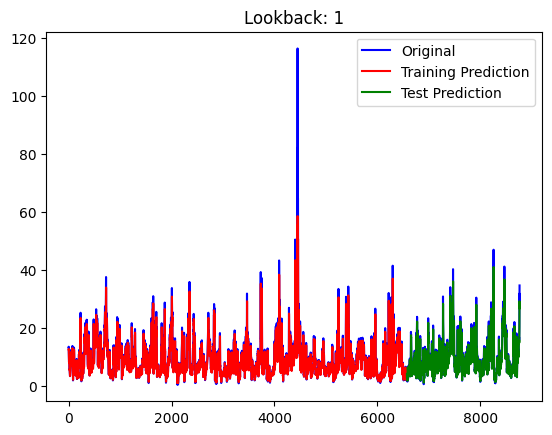

Epoch 0: train RMSE 3.0036, test RMSE 2.8717
Epoch 1: train RMSE 2.6966, test RMSE 2.3665
Epoch 2: train RMSE 2.5229, test RMSE 2.1221
Epoch 3: train RMSE 2.4422, test RMSE 2.0480
Epoch 4: train RMSE 2.3895, test RMSE 2.0081
Epoch 5: train RMSE 2.3658, test RMSE 2.0056
Epoch 6: train RMSE 2.3380, test RMSE 1.9735
Epoch 7: train RMSE 2.3159, test RMSE 2.0076
Epoch 8: train RMSE 2.3770, test RMSE 2.0937
Epoch 9: train RMSE 2.2688, test RMSE 1.9529
Epoch 10: train RMSE 2.2690, test RMSE 1.9428
Epoch 11: train RMSE 2.2838, test RMSE 2.0032
Epoch 12: train RMSE 2.2659, test RMSE 1.9568
Epoch 13: train RMSE 2.2475, test RMSE 1.9448
Epoch 14: train RMSE 2.2449, test RMSE 1.9482
Epoch 15: train RMSE 2.2401, test RMSE 1.9741
Epoch 16: train RMSE 2.2419, test RMSE 1.9987
Epoch 17: train RMSE 2.2281, test RMSE 1.9308
Epoch 18: train RMSE 2.2268, test RMSE 1.9373
Epoch 19: train RMSE 2.2293, test RMSE 1.9642
Epoch 20: train RMSE 2.2252, test RMSE 1.9607
Epoch 21: train RMSE 2.2819, test RMSE 2.100

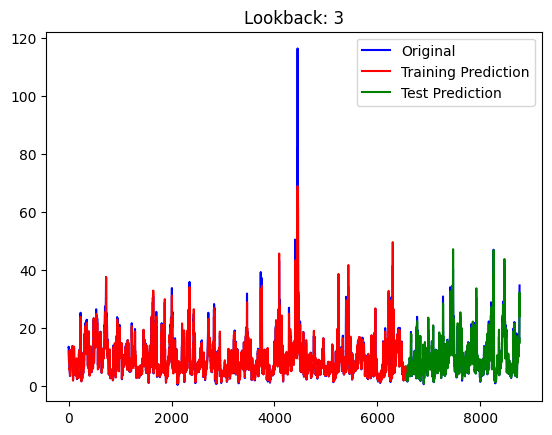

Epoch 0: train RMSE 2.9181, test RMSE 2.7156
Epoch 1: train RMSE 2.6078, test RMSE 2.2336
Epoch 2: train RMSE 2.4966, test RMSE 2.0923
Epoch 3: train RMSE 2.4241, test RMSE 2.0419
Epoch 4: train RMSE 2.3556, test RMSE 1.9862
Epoch 5: train RMSE 2.3104, test RMSE 1.9514
Epoch 6: train RMSE 2.2900, test RMSE 1.9655
Epoch 7: train RMSE 2.2659, test RMSE 1.9309
Epoch 8: train RMSE 2.2633, test RMSE 1.9626
Epoch 9: train RMSE 2.2388, test RMSE 1.9421
Epoch 10: train RMSE 2.2402, test RMSE 2.0055
Epoch 11: train RMSE 2.2289, test RMSE 1.9276
Epoch 12: train RMSE 2.2066, test RMSE 1.9310
Epoch 13: train RMSE 2.1975, test RMSE 1.9206
Epoch 14: train RMSE 2.2010, test RMSE 1.9436
Epoch 15: train RMSE 2.1922, test RMSE 1.9407
Epoch 16: train RMSE 2.1807, test RMSE 1.9325
Epoch 17: train RMSE 2.1890, test RMSE 1.9460
Epoch 18: train RMSE 2.1769, test RMSE 1.9653
Epoch 19: train RMSE 2.1749, test RMSE 1.9273
Epoch 20: train RMSE 2.1707, test RMSE 1.9568
Epoch 21: train RMSE 2.1878, test RMSE 1.942

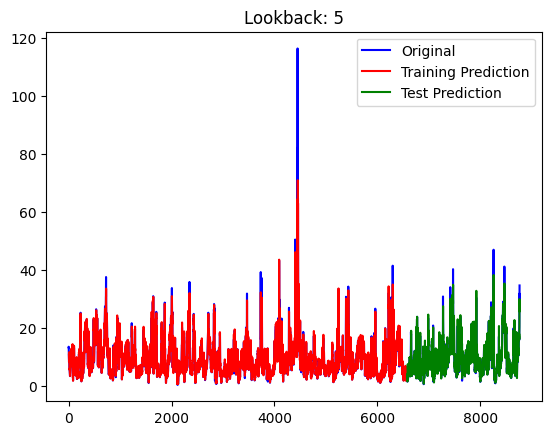

Epoch 0: train RMSE 2.9456, test RMSE 2.7424
Epoch 1: train RMSE 2.6125, test RMSE 2.2465
Epoch 2: train RMSE 2.4948, test RMSE 2.1015
Epoch 3: train RMSE 2.4014, test RMSE 2.0019
Epoch 4: train RMSE 2.3517, test RMSE 1.9740
Epoch 5: train RMSE 2.2962, test RMSE 1.9506
Epoch 6: train RMSE 2.2678, test RMSE 1.9381
Epoch 7: train RMSE 2.2516, test RMSE 1.9567
Epoch 8: train RMSE 2.2335, test RMSE 1.9473
Epoch 9: train RMSE 2.2087, test RMSE 1.9373
Epoch 10: train RMSE 2.2018, test RMSE 1.9317
Epoch 11: train RMSE 2.2080, test RMSE 1.9569
Epoch 12: train RMSE 2.1929, test RMSE 1.9701
Epoch 13: train RMSE 2.1818, test RMSE 1.9567
Epoch 14: train RMSE 2.1621, test RMSE 1.9295
Epoch 15: train RMSE 2.1623, test RMSE 1.9323
Epoch 16: train RMSE 2.1699, test RMSE 1.9301
Epoch 17: train RMSE 2.1626, test RMSE 1.9756
Epoch 18: train RMSE 2.1522, test RMSE 1.9610
Epoch 19: train RMSE 2.1466, test RMSE 1.9585
Epoch 20: train RMSE 2.1389, test RMSE 1.9321
Epoch 21: train RMSE 2.1375, test RMSE 1.971

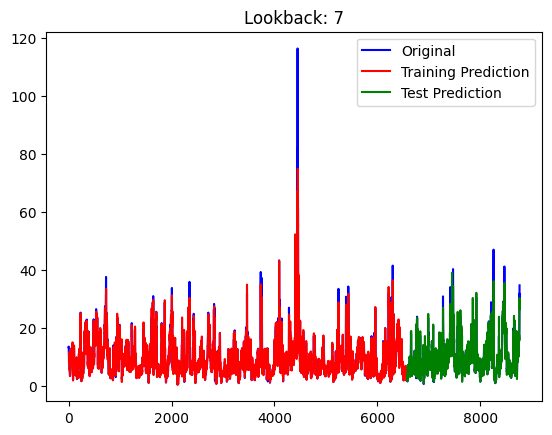

Epoch 0: train RMSE 2.9802, test RMSE 2.7958
Epoch 1: train RMSE 2.6108, test RMSE 2.2414
Epoch 2: train RMSE 2.4838, test RMSE 2.0780
Epoch 3: train RMSE 2.3950, test RMSE 1.9898
Epoch 4: train RMSE 2.3793, test RMSE 1.9838
Epoch 5: train RMSE 2.3188, test RMSE 1.9975
Epoch 6: train RMSE 2.2717, test RMSE 1.9663
Epoch 7: train RMSE 2.2280, test RMSE 1.9314
Epoch 8: train RMSE 2.2131, test RMSE 1.9217
Epoch 9: train RMSE 2.2090, test RMSE 1.9703
Epoch 10: train RMSE 2.1833, test RMSE 1.9331
Epoch 11: train RMSE 2.1772, test RMSE 1.9417
Epoch 12: train RMSE 2.1836, test RMSE 1.9808
Epoch 13: train RMSE 2.1722, test RMSE 1.9565
Epoch 14: train RMSE 2.1563, test RMSE 1.9410
Epoch 15: train RMSE 2.1599, test RMSE 1.9996
Epoch 16: train RMSE 2.1385, test RMSE 1.9450
Epoch 17: train RMSE 2.1245, test RMSE 1.9101
Epoch 18: train RMSE 2.1484, test RMSE 2.0025
Epoch 19: train RMSE 2.1124, test RMSE 1.9508
Epoch 20: train RMSE 2.1175, test RMSE 1.9470
Epoch 21: train RMSE 2.1066, test RMSE 1.939

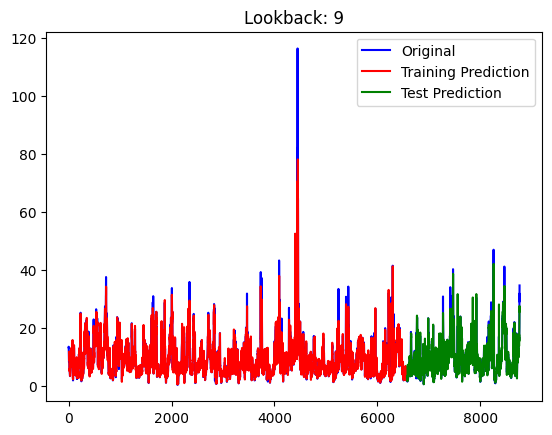

Epoch 0: train RMSE 2.9099, test RMSE 2.6929
Epoch 1: train RMSE 2.5891, test RMSE 2.2057
Epoch 2: train RMSE 2.4489, test RMSE 2.0318
Epoch 3: train RMSE 2.3691, test RMSE 1.9765
Epoch 4: train RMSE 2.3118, test RMSE 1.9384
Epoch 5: train RMSE 2.2718, test RMSE 1.9592
Epoch 6: train RMSE 2.2467, test RMSE 1.9969
Epoch 7: train RMSE 2.2090, test RMSE 1.9456
Epoch 8: train RMSE 2.1937, test RMSE 1.9556
Epoch 9: train RMSE 2.2277, test RMSE 2.0028
Epoch 10: train RMSE 2.1863, test RMSE 1.9957
Epoch 11: train RMSE 2.1466, test RMSE 1.9478
Epoch 12: train RMSE 2.1402, test RMSE 1.9447
Epoch 13: train RMSE 2.1296, test RMSE 1.9125
Epoch 14: train RMSE 2.1164, test RMSE 1.9495
Epoch 15: train RMSE 2.1092, test RMSE 1.9527
Epoch 16: train RMSE 2.1102, test RMSE 1.9662
Epoch 17: train RMSE 2.0885, test RMSE 1.9564
Epoch 18: train RMSE 2.0793, test RMSE 1.9485
Epoch 19: train RMSE 2.0786, test RMSE 1.9770
Epoch 20: train RMSE 2.0813, test RMSE 1.9574
Epoch 21: train RMSE 2.0661, test RMSE 1.980

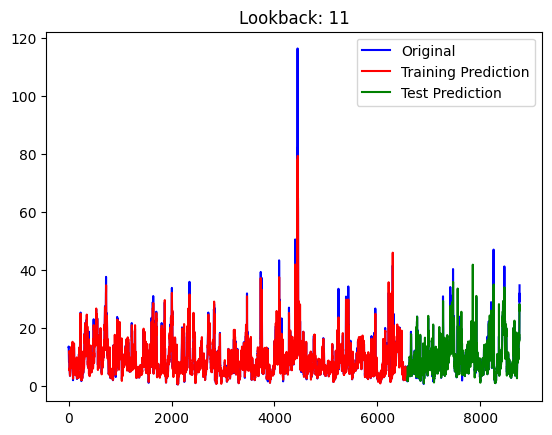

Epoch 0: train RMSE 2.9228, test RMSE 2.7050
Epoch 1: train RMSE 2.5982, test RMSE 2.2144
Epoch 2: train RMSE 2.4554, test RMSE 2.0415
Epoch 3: train RMSE 2.3898, test RMSE 1.9827
Epoch 4: train RMSE 2.3161, test RMSE 1.9663
Epoch 5: train RMSE 2.2704, test RMSE 1.9529
Epoch 6: train RMSE 2.2465, test RMSE 1.9831
Epoch 7: train RMSE 2.2424, test RMSE 2.0096
Epoch 8: train RMSE 2.1839, test RMSE 1.9168
Epoch 9: train RMSE 2.1716, test RMSE 1.9476
Epoch 10: train RMSE 2.1484, test RMSE 1.9231
Epoch 11: train RMSE 2.1275, test RMSE 1.9475
Epoch 12: train RMSE 2.1090, test RMSE 1.9421
Epoch 13: train RMSE 2.0917, test RMSE 1.9227
Epoch 14: train RMSE 2.0801, test RMSE 1.9322
Epoch 15: train RMSE 2.0742, test RMSE 1.9248
Epoch 16: train RMSE 2.0946, test RMSE 1.9531
Epoch 17: train RMSE 2.0377, test RMSE 1.9602
Epoch 18: train RMSE 2.0337, test RMSE 1.9626
Epoch 19: train RMSE 2.0414, test RMSE 1.9957
Epoch 20: train RMSE 2.0288, test RMSE 1.9808
Epoch 21: train RMSE 2.0057, test RMSE 1.924

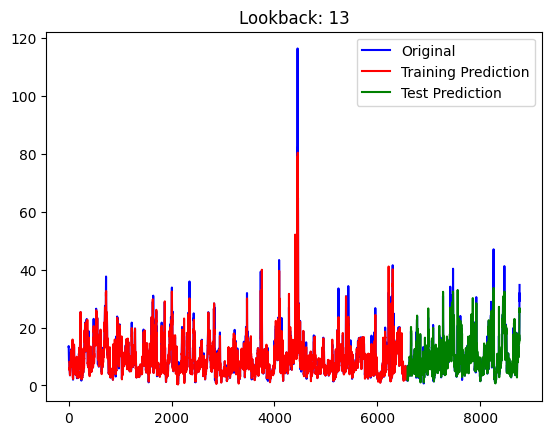

Epoch 0: train RMSE 2.8925, test RMSE 2.6526
Epoch 1: train RMSE 2.5762, test RMSE 2.1795
Epoch 2: train RMSE 2.4529, test RMSE 2.0342
Epoch 3: train RMSE 2.3670, test RMSE 1.9467
Epoch 4: train RMSE 2.2928, test RMSE 1.9266
Epoch 5: train RMSE 2.2522, test RMSE 1.9637
Epoch 6: train RMSE 2.2191, test RMSE 1.9393
Epoch 7: train RMSE 2.1861, test RMSE 1.9214
Epoch 8: train RMSE 2.1612, test RMSE 1.9216
Epoch 9: train RMSE 2.1496, test RMSE 1.9204
Epoch 10: train RMSE 2.1167, test RMSE 1.9381
Epoch 11: train RMSE 2.1465, test RMSE 1.9419
Epoch 12: train RMSE 2.0936, test RMSE 1.9881
Epoch 13: train RMSE 2.0639, test RMSE 1.9456
Epoch 14: train RMSE 2.0543, test RMSE 1.9504
Epoch 15: train RMSE 2.0294, test RMSE 1.9468
Epoch 16: train RMSE 2.0200, test RMSE 1.9426
Epoch 17: train RMSE 2.0341, test RMSE 1.9752
Epoch 18: train RMSE 2.0086, test RMSE 2.0092
Epoch 19: train RMSE 1.9899, test RMSE 1.9815
Epoch 20: train RMSE 1.9683, test RMSE 1.9602
Epoch 21: train RMSE 1.9633, test RMSE 1.975

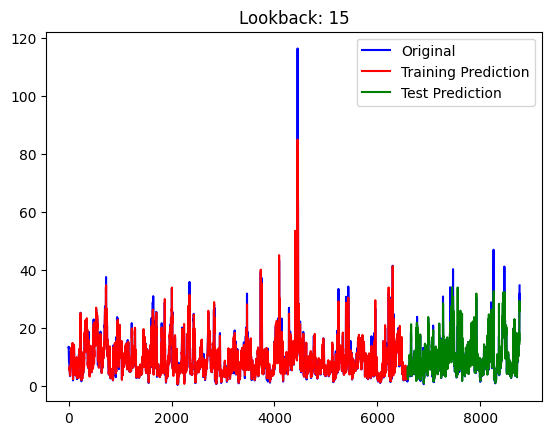

Epoch 0: train RMSE 2.8805, test RMSE 2.6350
Epoch 1: train RMSE 2.5732, test RMSE 2.1841
Epoch 2: train RMSE 2.4389, test RMSE 2.0204
Epoch 3: train RMSE 2.3627, test RMSE 1.9790
Epoch 4: train RMSE 2.2826, test RMSE 1.9434
Epoch 5: train RMSE 2.2265, test RMSE 1.9264
Epoch 6: train RMSE 2.1978, test RMSE 1.9679
Epoch 7: train RMSE 2.2126, test RMSE 2.0065
Epoch 8: train RMSE 2.1347, test RMSE 1.9598
Epoch 9: train RMSE 2.1377, test RMSE 1.9831
Epoch 10: train RMSE 2.0883, test RMSE 1.9572
Epoch 11: train RMSE 2.0702, test RMSE 1.9237
Epoch 12: train RMSE 2.0675, test RMSE 1.9281
Epoch 13: train RMSE 2.0660, test RMSE 1.9737
Epoch 14: train RMSE 2.0196, test RMSE 1.9680
Epoch 15: train RMSE 2.0347, test RMSE 1.9662
Epoch 16: train RMSE 1.9784, test RMSE 1.9541
Epoch 17: train RMSE 1.9740, test RMSE 1.9584
Epoch 18: train RMSE 1.9591, test RMSE 1.9908
Epoch 19: train RMSE 1.9476, test RMSE 1.9820
Epoch 20: train RMSE 1.9446, test RMSE 1.9624
Epoch 21: train RMSE 1.9536, test RMSE 1.998

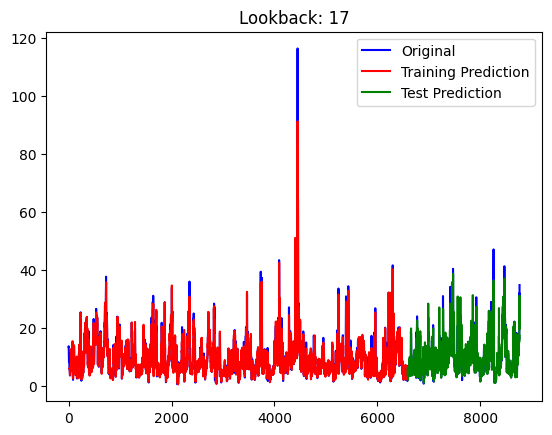

Epoch 0: train RMSE 2.8564, test RMSE 2.6016
Epoch 1: train RMSE 2.5525, test RMSE 2.1477
Epoch 2: train RMSE 2.4290, test RMSE 2.0323
Epoch 3: train RMSE 2.3443, test RMSE 1.9612
Epoch 4: train RMSE 2.2817, test RMSE 1.9446
Epoch 5: train RMSE 2.2405, test RMSE 1.9470
Epoch 6: train RMSE 2.2032, test RMSE 1.9211
Epoch 7: train RMSE 2.1800, test RMSE 1.9815
Epoch 8: train RMSE 2.1375, test RMSE 1.9255
Epoch 9: train RMSE 2.1191, test RMSE 1.9324
Epoch 10: train RMSE 2.1208, test RMSE 1.9604
Epoch 11: train RMSE 2.0591, test RMSE 1.9178
Epoch 12: train RMSE 2.0646, test RMSE 1.9738
Epoch 13: train RMSE 2.0500, test RMSE 1.9527
Epoch 14: train RMSE 2.0063, test RMSE 1.9211
Epoch 15: train RMSE 2.0000, test RMSE 1.9431
Epoch 16: train RMSE 1.9928, test RMSE 1.9460
Epoch 17: train RMSE 1.9919, test RMSE 1.9735
Epoch 18: train RMSE 1.9594, test RMSE 1.9371
Epoch 19: train RMSE 1.9341, test RMSE 1.9483
Epoch 20: train RMSE 1.9316, test RMSE 1.9528
Epoch 21: train RMSE 1.9228, test RMSE 1.974

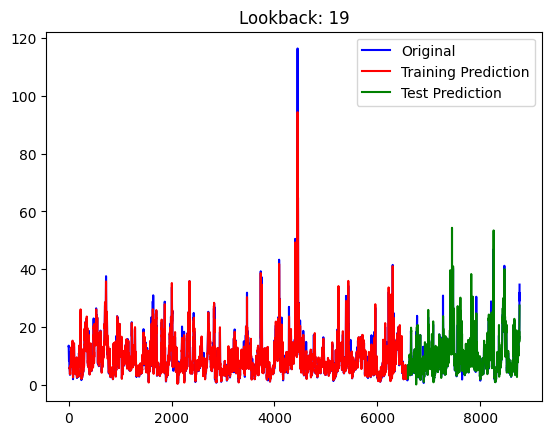

Epoch 0: train RMSE 2.9335, test RMSE 2.7216
Epoch 1: train RMSE 2.5949, test RMSE 2.2066
Epoch 2: train RMSE 2.4502, test RMSE 2.0400
Epoch 3: train RMSE 2.3579, test RMSE 1.9726
Epoch 4: train RMSE 2.2825, test RMSE 1.9269
Epoch 5: train RMSE 2.2229, test RMSE 1.9387
Epoch 6: train RMSE 2.1895, test RMSE 1.9385
Epoch 7: train RMSE 2.1500, test RMSE 1.9359
Epoch 8: train RMSE 2.1360, test RMSE 1.9550
Epoch 9: train RMSE 2.0884, test RMSE 1.9381
Epoch 10: train RMSE 2.0701, test RMSE 1.9916
Epoch 11: train RMSE 2.0367, test RMSE 1.9634
Epoch 12: train RMSE 2.0394, test RMSE 1.9594
Epoch 13: train RMSE 2.0109, test RMSE 1.9605
Epoch 14: train RMSE 2.0171, test RMSE 1.9743
Epoch 15: train RMSE 1.9732, test RMSE 1.9618
Epoch 16: train RMSE 2.0236, test RMSE 2.0241
Epoch 17: train RMSE 1.9277, test RMSE 1.9804
Epoch 18: train RMSE 2.0441, test RMSE 2.1134
Epoch 19: train RMSE 1.9032, test RMSE 1.9806
Epoch 20: train RMSE 1.8863, test RMSE 1.9858
Epoch 21: train RMSE 1.8606, test RMSE 2.005

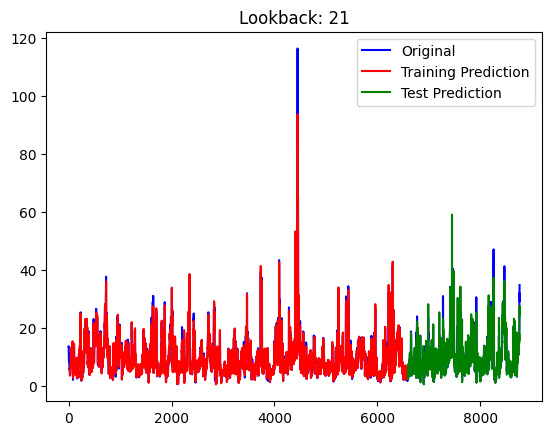

In [62]:
lookbacks = [1,3,5,7,9,11,13,15,17,19,21]
n_epochs = 75
train_size = len(train)  # Assuming 'train' is defined
num_layers = 1
input_size = 1
batch_size = 8
list_of_rmse_test = []
list_of_rmse_train = []
for lookback in lookbacks:
    X_train, y_train = create_dataset(train, lookback=lookback)
    X_test, y_test = create_dataset(test, lookback=lookback)
    class LSTM_Model(nn.Module):
      def __init__(self):
          super().__init__()
          self.lstm = nn.LSTM(input_size=input_size, hidden_size=50, num_layers=num_layers, batch_first=True)
          self.linear = nn.Linear(50, 1)
      def forward(self, x):
          x, _ = self.lstm(x)
          x = self.linear(x)
          return x
    model = LSTM_Model()
    optimizer = optim.Adam(model.parameters())
    loss_fn = nn.MSELoss()
    loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=batch_size)

    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch in loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # Validation
        model.eval()
        with torch.no_grad():
            y_pred = model(X_train)
            train_rmse = np.sqrt(loss_fn(y_pred, y_train))
            y_pred = model(X_test)
            test_rmse = np.sqrt(loss_fn(y_pred, y_test))
        print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
    list_of_rmse_test.append(test_rmse)
    list_of_rmse_train.append(train_rmse)
    with torch.no_grad():
        # shift train predictions for plotting
        train_plot = np.ones_like(timeseries) * np.nan
        y_pred = model(X_train)
        y_pred = y_pred[:, -1, :]
        train_plot[lookback:train_size] = model(X_train)[:, -1, :]
        # shift test predictions for plotting
        test_plot = np.ones_like(timeseries) * np.nan
        test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
    # plot
    plt.figure()
    plt.plot(timeseries, c='b', label='Original')
    plt.plot(train_plot, c='r', label='Training Prediction')
    plt.plot(test_plot, c='g', label='Test Prediction')
    plt.title(f"Lookback: {lookback}")
    plt.legend()
    plt.savefig(f"plot_lookback_{lookback}.png")
    plt.show()


In [63]:
print(list_of_rmse_test)

[tensor(1.9798), tensor(1.9712), tensor(1.9170), tensor(1.9731), tensor(1.9998), tensor(2.0497), tensor(2.1333), tensor(2.2102), tensor(2.1384), tensor(2.1875), tensor(2.3006)]


In [64]:
print(list_of_rmse_train)

[tensor(2.3129), tensor(2.1983), tensor(2.0924), tensor(1.9976), tensor(1.9084), tensor(1.8019), tensor(1.8599), tensor(1.6188), tensor(1.5510), tensor(1.5040), tensor(1.4558)]


In [67]:
numbers_test = [t.item() for t in list_of_rmse_test]
numbers_test
numbers_train = [t.item() for t in list_of_rmse_train]
numbers_train

[2.312948226928711,
 2.1982593536376953,
 2.0923514366149902,
 1.9976485967636108,
 1.9084235429763794,
 1.8018664121627808,
 1.8598722219467163,
 1.6187667846679688,
 1.5510369539260864,
 1.503982663154602,
 1.4557504653930664]

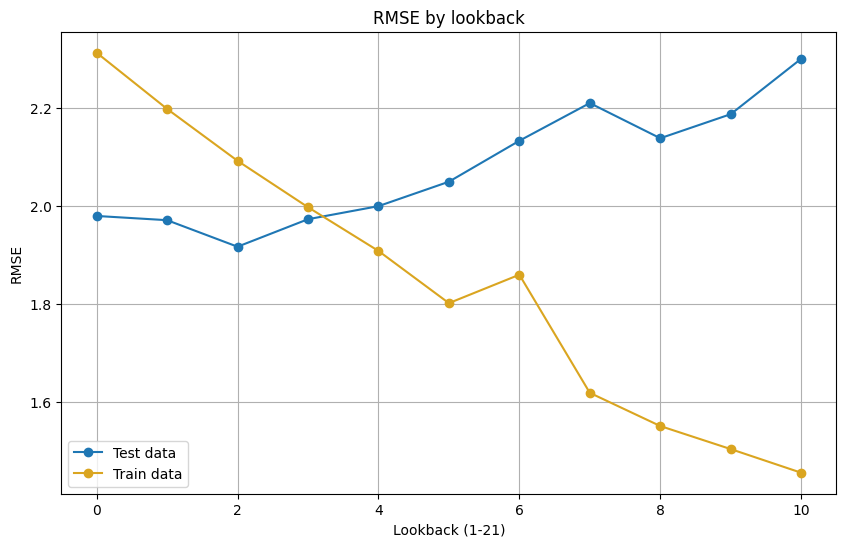

In [68]:

plt.figure(figsize=(10,6))
plt.plot(numbers_test, marker='o', label='Test data')
plt.plot(numbers_train, marker='o', color='goldenrod', label='Train data')
plt.title("RMSE by lookback")
plt.xlabel("Lookback (1-21)")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()